**Name - NIM**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

In [65]:
df = pd.read_csv('https://raw.githubusercontent.com/iwakkk/Data-Mining-Dataset/refs/heads/main/Bank.csv', delimiter = ';')

df.sample(5)

# Import csv data from url and showing 5 random rows.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2408,46,blue-collar,married,secondary,no,0,yes,no,cellular,8,may,264,2,-1,0,unknown,no
2288,50,technician,married,secondary,no,1412,no,no,cellular,6,aug,131,3,-1,0,unknown,no
4274,35,blue-collar,married,primary,no,378,yes,no,unknown,16,may,427,3,-1,0,unknown,no
3291,48,technician,married,tertiary,no,9207,no,no,cellular,18,aug,445,3,-1,0,unknown,no
2921,43,management,single,secondary,no,1029,yes,no,unknown,2,jun,145,1,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [66]:
df.info()

# Shows the info of the data, we can see that the data has no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


<ipython-input-67-5efe3dfa97a5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='job', order=job_order, palette='viridis')


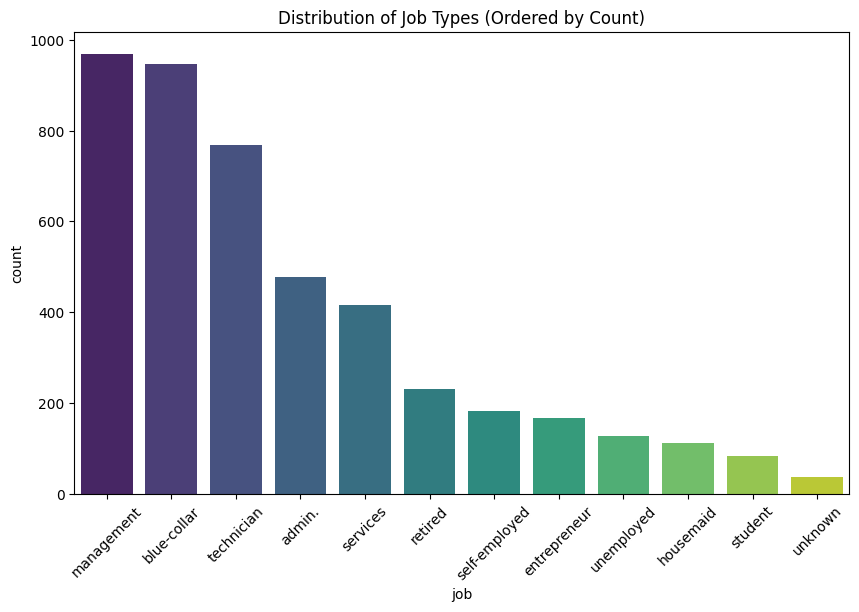

In [67]:
job_order = df['job'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job', order=job_order, palette='viridis')
plt.title('Distribution of Job Types (Ordered by Count)')
plt.xticks(rotation=45)
plt.show()

# Visualize the number of employees from the highest to lowest. from the bar chart, we can see that management has the most employees.

<ipython-input-68-60858d4773c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='job', y='age', palette='Set2')


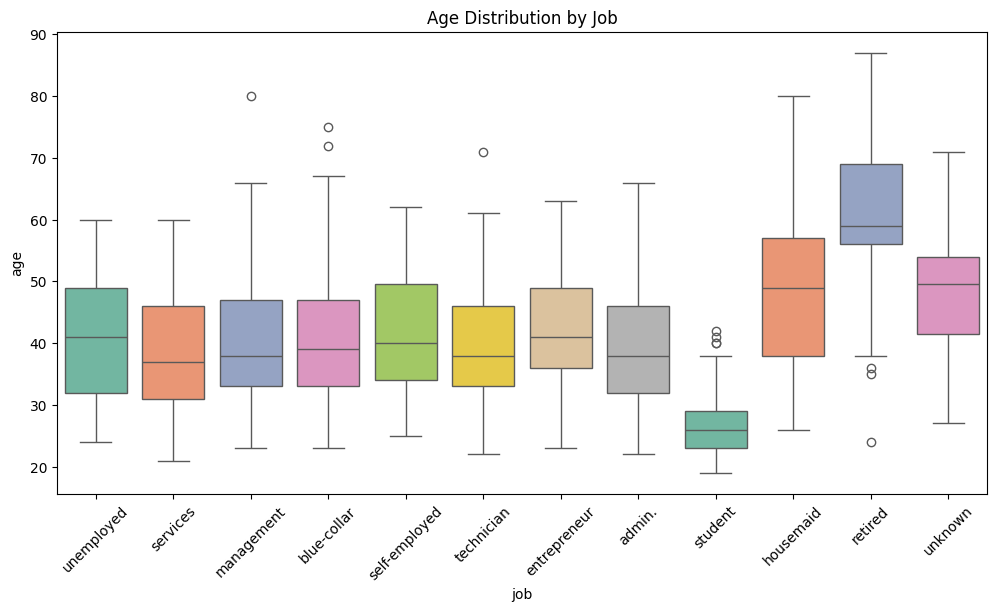

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='job', y='age', palette='Set2')
plt.title('Age Distribution by Job')
plt.xticks(rotation=45)
plt.show()

# Visualize the age for every job types using box plot. We can see that oldest people is in the retire and housemaid job categories while the youngest are student

In [69]:
df['job'] = df['job'].replace('management', 'admin')
df.sample(5)

# Combining the management and admin job categories because it is similiar.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
505,31,unemployed,married,secondary,no,296,yes,no,unknown,20,may,378,3,-1,0,unknown,no
725,31,admin,married,tertiary,no,1010,yes,no,cellular,15,may,385,3,364,9,other,no
2332,30,admin,married,tertiary,no,102,yes,no,cellular,5,apr,470,7,426,3,other,yes
3522,54,technician,married,secondary,no,89,yes,no,cellular,10,jul,140,3,-1,0,unknown,no
3439,34,admin.,married,secondary,no,5320,no,no,cellular,3,mar,114,6,467,5,other,no


In [70]:
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column].astype(str))

df.head(5)

# Encodes the data using label encoder to make a heatmap and calculates the data.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,0,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,0,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,2,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


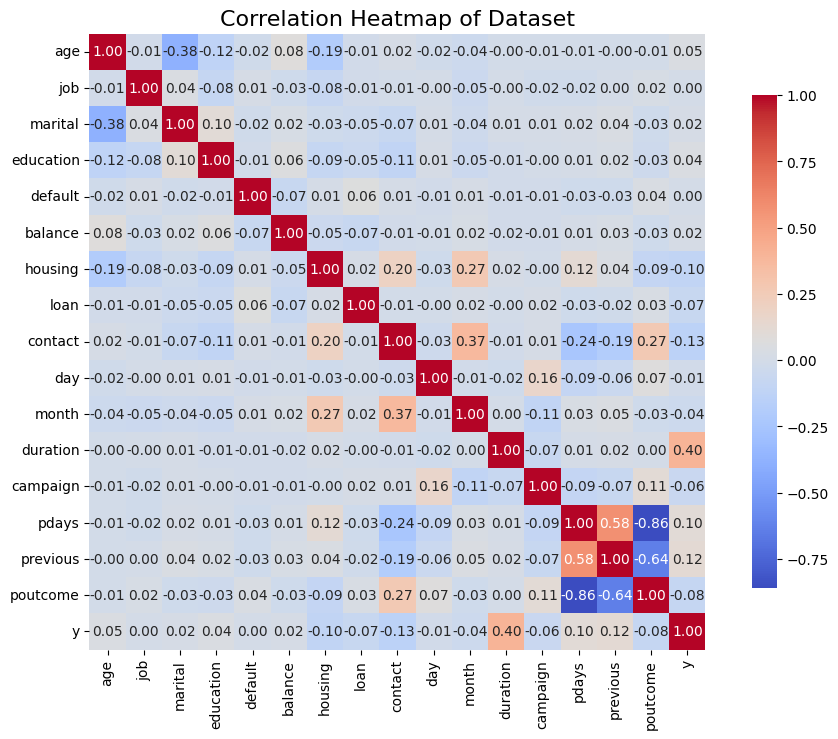

In [71]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Dataset', fontsize=16)

plt.show()

# Visualize the data using correlation heatmap. We can see that y is correlated to duration, pdays, and previous.

## Machine Learning (Split Data)

In [72]:
X = df[['duration', 'pdays', 'previous']]
y = df['y']

# Splitting the data, as we know from the heatmap above, y is only correlated to duration, pdays, and previous so we can drop the columns that is not correlated.

In [73]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)

# Fit and resample the training data
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Display the distribution of the target variable after SMOTE
print(pd.Series(y_resampled).value_counts())

# Using SMOTEENN to balance the data. This also can increase the accuracy of the dataset.

y
0    2941
1    2266
Name: count, dtype: int64


In [74]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# Splits the data into train and test, the train size is 4165 and the test size is 1042

Shape of X_train: (4165, 3)
Shape of X_test: (1042, 3)


## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

# Declaring and fitting the data using Random Forest classifier with 100 estimators

RandomForestClassifier(random_state=42)

In [76]:
y_pred_rf = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy}')

# Shows the accuracy of the Random Forest and the accuracy is very good (99%)

Accuracy: 0.9942418426103646


In [77]:
y_train_rf = rf_classifier.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_rf)
training_accuracy = accuracy_score(y_train, y_train_rf)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Checks the accuracy of testing and training. The training accuracy is higher than testing accuracy that may indicates overfitting

Testing accuracy: 0.9942
Training accuracy: 1.0000


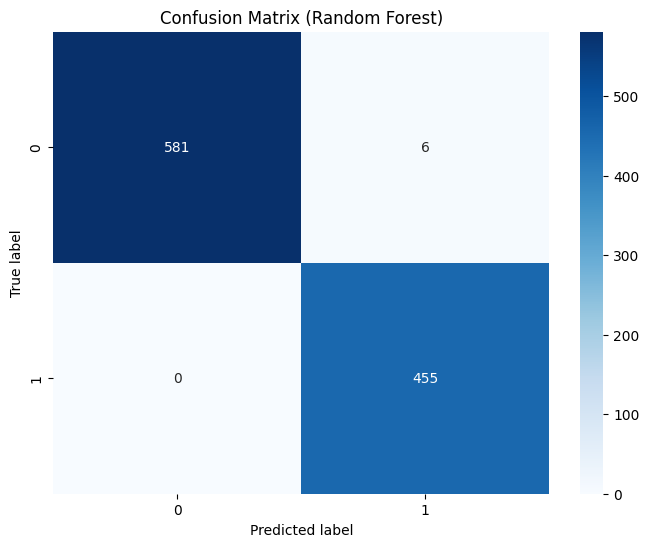

In [78]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Confusion matrix of Random Forest, showing that the Random Forest only mispredicted 6 out of 1042 data.

In [79]:
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report of Random Forest: \n", class_report_rf)

# Showing the classification report of Random Forest. Showing that it has 99% accuracy.

Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       587
           1       0.99      1.00      0.99       455

    accuracy                           0.99      1042
   macro avg       0.99      0.99      0.99      1042
weighted avg       0.99      0.99      0.99      1042



## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier(n_estimators = 100, random_state = 42)

gbc_clf.fit(X_train, y_train)

# Declaring and fitting the dataset into GradientBoostingClassifier with estimator = 100

GradientBoostingClassifier(random_state=42)

In [81]:
y_pred_gbc = gbc_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_gbc)

print(f'Accuracy: {accuracy}')

# Checks the accuracy of the prediction using GBC (97%)

Accuracy: 0.9788867562380038


In [82]:
y_train_gbc = gbc_clf.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_gbc)
training_accuracy = accuracy_score(y_train, y_train_gbc)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Checks the training and testing accuracy. It shows that it is wellfitted because training and testing accuracy has a very small gap

Testing accuracy: 0.9789
Training accuracy: 0.9815


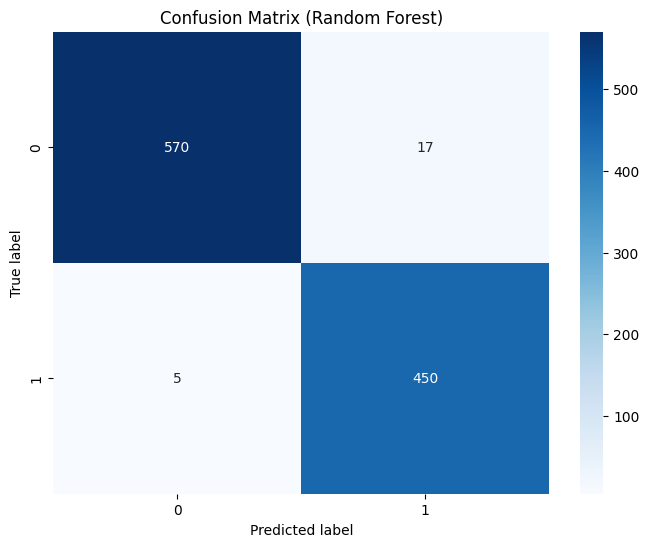

In [83]:
cm = confusion_matrix(y_test, y_pred_gbc)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (GBC)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Shows the confusion matrix of GBC. Predicted 1020 out of 1042 data correctly.

In [84]:
class_report_gbc = classification_report(y_test, y_pred_gbc)
print("Classification Report of Random Forest: \n", class_report_gbc)

# Shows the classification report of GBC such as precision, recall, f1 support, and accuracy.

Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       587
           1       0.96      0.99      0.98       455

    accuracy                           0.98      1042
   macro avg       0.98      0.98      0.98      1042
weighted avg       0.98      0.98      0.98      1042



In [ ]:
# From the answers above, we can conclude that Random Forest is more accurate than Gradient Boosting Classifier. Eventhough both classifiers show very good accuracy, Random Forest is 1% more accurate than GBC, making it a better choice for this dataset.